In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import igrins_mod as ig # Custom module file for igrins shenanigans

import glob
import os
import warnings

import astropy.units as u
# from astropy.modeling import models, fitting
from astroquery.nist import Nist # atomic lines
# from astroquery.linelists.cdms import CDMS # molecular lines?

# from specutils import Spectrum1D
# from specutils.fitting import fit_generic_continuum

from scipy.integrate import trapz, simpson
from scipy.optimize import curve_fit
from scipy.signal import medfilt

# from astropy.io import ascii
from astropy.io import fits


%matplotlib inline

# Plotting Parameters
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] =18

plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.titlesize'] = 20

plt.rcParams['axes.labelweight']='bold'
plt.rcParams['axes.linewidth'] = 3

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.minor.size'] = 5

plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.minor.size'] = 5

plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.direction'] = 'in'

In [7]:
data_path = 'ishell_reduced\\*.fits'
filelist = glob.glob(data_path)
filelist[0]

'ishell_reduced\\hd37887_k2_7.fits'

In [9]:
fits.getheader(filelist[0])

SIMPLE  =                    T / Written by IDL:  Sun Nov 12 22:51:15 2017      
BITPIX  =                  -64 /Real*8 (double precision)                       
NAXIS   =                    3 /                                                
NAXIS1  =                 1432 /                                                
NAXIS2  =                    4 /                                                
NAXIS3  =                   31 /                                                
INSTR   = 'iSHELL  '           / Instrument                                     
MODE    = 'K2      '           / Instrument mode                                
FILENAME= 'spectra00007.fits'  / Filename                                       
DATE    = '2016-11-07'         / Observation date in UTC                        
TIME    = '11:14:00.322984'    / Observation time in UTC                        
MJD     = '57699.4680592939'   / Modified Julian date OBSDATE+TIME_OBS          
NCOADDS =                   

In [32]:
filelist

['ishell_reduced\\hd37887_k2_7.fits',
 'ishell_reduced\\hd37887_k2_8.fits',
 'ishell_reduced\\hd37887_k2_9.fits',
 'ishell_reduced\\hops174_K2_83.fits',
 'ishell_reduced\\hops385_K2_5.fits',
 'ishell_reduced\\hops385_K2_6.fits',
 'ishell_reduced\\hops58_k2_1.fits',
 'ishell_reduced\\hops58_k2_2.fits',
 'ishell_reduced\\hops58_k2_3.fits']

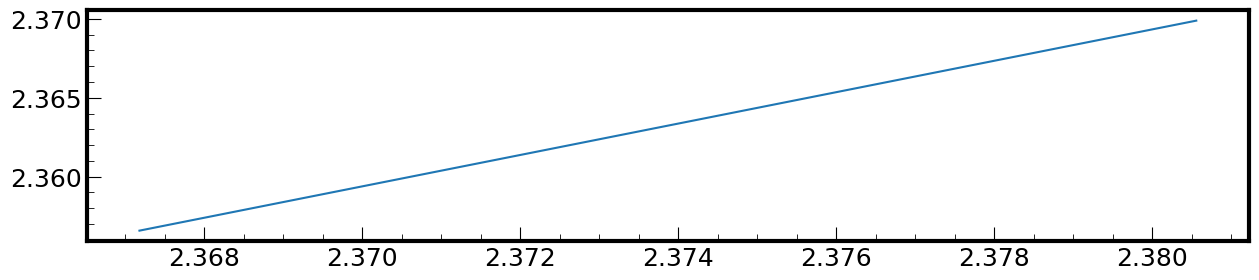

In [31]:
wl = fits.getdata(filelist[0])[0][0] #?
flux = fits.getdata(filelist[0])[1][0] #?

fig = plt.figure(figsize=(15,3))
plt.plot(wl,flux)
plt.show()